In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv


In [39]:
train = pd.read_csv("../input/titanic/train.csv")

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


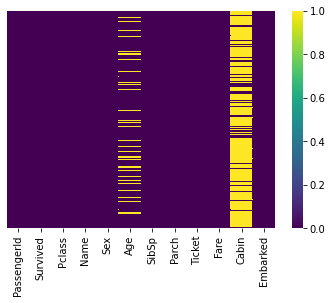

In [42]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

In [43]:
train.drop('Cabin',axis=1,inplace=True)

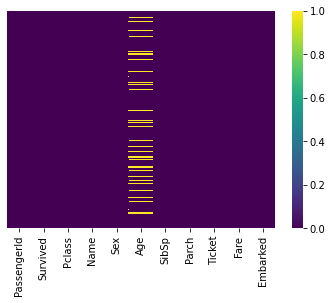

In [44]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


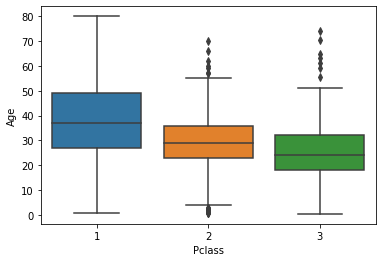

In [45]:
print(train.groupby(['Pclass'])['Age'].mean())
sns.boxplot(x='Pclass',y='Age',data=train)

In [46]:
def change_age(cols):
    Pclass = cols[1]
    Age = cols[0]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        elif Pclass == 3:
            return 25
    else:
        return Age

In [47]:
train['Age'] = train[['Age','Pclass']].apply(change_age,axis=1)

In [48]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


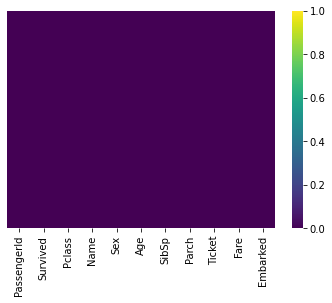

In [49]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

In [50]:
train.dropna(inplace=True)

In [51]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


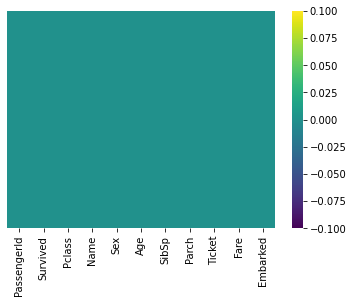

In [52]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

In [53]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [55]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
pclass = pd.get_dummies(train['Pclass'])
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [56]:
train = pd.concat([train,pclass,sex,embark],axis = 1)

In [57]:
train.drop('Sex',axis=1,inplace=True)
train.drop('Embarked',axis = 1,inplace=True)
train.drop(['Name','Pclass','Ticket','Fare'],axis = 1,inplace=True)
train

,PassengerId,Survived,Age,SibSp,Parch,1,2,3,male,Q,S
0,1,0,22.0,1,0,0,0,1,1,0,1
1,2,1,38.0,1,0,1,0,0,0,0,0
2,3,1,26.0,0,0,0,0,1,0,0,1
3,4,1,35.0,1,0,1,0,0,0,0,1
4,5,0,35.0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,0,1,0,1,0,1
887,888,1,19.0,0,0,1,0,0,0,0,1
888,889,0,25.0,1,2,0,0,1,0,0,1
889,890,1,26.0,0,0,1,0,0,1,0,0


In [58]:
train.drop('PassengerId',axis = 1,inplace=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'], test_size=0.30)

In [59]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'], test_size=0.30)

In [60]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [61]:
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [62]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[154  18]
 [ 24  71]]


              precision    recall  f1-score   support

           0       0.87      0.90      0.88       172
           1       0.80      0.75      0.77        95

    accuracy                           0.84       267
   macro avg       0.83      0.82      0.83       267
weighted avg       0.84      0.84      0.84       267



In [63]:
test = pd.read_csv("../input/titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [64]:
log = LogisticRegression()

In [65]:
log.fit(train.drop('Survived',axis = 1),train['Survived'])

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [67]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [68]:
tsex = pd.get_dummies(test['Sex'],drop_first=True)
tembark = pd.get_dummies(test['Embarked'],drop_first=True)
tpclass = pd.get_dummies(test['Pclass'])
test = pd.concat([test,tpclass,tsex,tembark],axis = 1)
test.drop('Sex',axis=1,inplace=True)
test.drop('Embarked',axis = 1,inplace=True)
test.drop(['Name','Ticket','Fare'],axis = 1,inplace=True)
test

,PassengerId,Pclass,Age,SibSp,Parch,Cabin,1,2,3,male,Q,S
0,892,3,34.5,0,0,NaN,0,0,1,1,1,0
1,893,3,47.0,1,0,NaN,0,0,1,0,0,1
2,894,2,62.0,0,0,NaN,0,1,0,1,1,0
3,895,3,27.0,0,0,NaN,0,0,1,1,0,1
4,896,3,22.0,1,1,NaN,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,NaN,0,0,NaN,0,0,1,1,0,1
414,1306,1,39.0,0,0,C105,1,0,0,0,0,0
415,1307,3,38.5,0,0,NaN,0,0,1,1,0,1
416,1308,3,NaN,0,0,NaN,0,0,1,1,0,1


In [69]:
test.drop('PassengerId',axis = 1,inplace=True)

In [70]:
test.head()

,Pclass,Age,SibSp,Parch,Cabin,1,2,3,male,Q,S
0,3,34.5,0,0,NaN,0,0,1,1,1,0
1,3,47.0,1,0,NaN,0,0,1,0,0,1
2,2,62.0,0,0,NaN,0,1,0,1,1,0
3,3,27.0,0,0,NaN,0,0,1,1,0,1
4,3,22.0,1,1,NaN,0,0,1,0,0,1


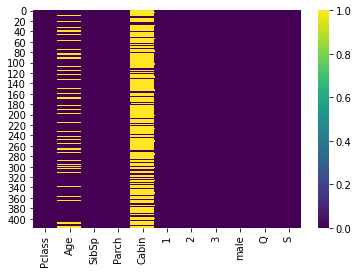

In [71]:
sns.heatmap(test.isnull(),cmap = 'viridis')

In [72]:
test.drop('Cabin',axis = 1,inplace = True)

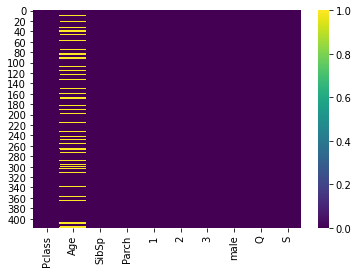

In [73]:
sns.heatmap(test.isnull(),cmap = 'viridis')

In [74]:
test['Age'] = test[['Age','Pclass']].apply(change_age,axis=1)

In [75]:
test.drop('Pclass',axis = 1,inplace = True)

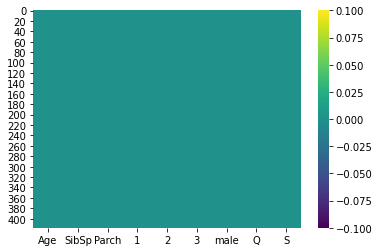

In [76]:
sns.heatmap(test.isnull(),cmap = 'viridis')

In [77]:
pred_test = log.predict(test)

In [78]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[154  18]
 [ 24  71]]


              precision    recall  f1-score   support

           0       0.87      0.90      0.88       172
           1       0.80      0.75      0.77        95

    accuracy                           0.84       267
   macro avg       0.83      0.82      0.83       267
weighted avg       0.84      0.84      0.84       267



In [79]:
pred_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [80]:
# test2 = pd.read_csv("../input/titanic/test.csv")
# my_submission = pd.DataFrame({'PassengerId': test2.PassengerId, 'Survived': pred_test})
# # you could use any filename. We choose submission here
# my_submission.to_csv('submission.csv', index=False)

In [81]:
test2 = pd.read_csv("../input/titanic/test.csv")
my_submission2 = pd.DataFrame({'PassengerId': test2.PassengerId, 'Survived': pred_test})
# you could use any filename. We choose submission here
my_submission2.to_csv('submission.csv', index=False)